# Read the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import gc

In [2]:
calendar = pd.read_csv('calendar.csv',parse_dates=['date'],infer_datetime_format=True)
sales_train_evaluation = pd.read_csv('sales_train_evaluation.csv')
sell_prices = pd.read_csv('sell_prices.csv')

In [3]:
display(calendar.head(2))
display(calendar.tail(2))

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0


,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
1967,2016-06-18,11621,Saturday,1,6,2016,d_1968,NaN,NaN,NaN,NaN,0,0,0
1968,2016-06-19,11621,Sunday,2,6,2016,d_1969,NBAFinalsEnd,Sporting,Father's day,Cultural,0,0,0


In [4]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int64         
 2   weekday       1969 non-null   object        
 3   wday          1969 non-null   int64         
 4   month         1969 non-null   int64         
 5   year          1969 non-null   int64         
 6   d             1969 non-null   object        
 7   event_name_1  162 non-null    object        
 8   event_type_1  162 non-null    object        
 9   event_name_2  5 non-null      object        
 10  event_type_2  5 non-null      object        
 11  snap_CA       1969 non-null   int64         
 12  snap_TX       1969 non-null   int64         
 13  snap_WI       1969 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 215.5+ KB


In [5]:
calendar.describe()

,wm_yr_wk,wday,month,year,snap_CA,snap_TX,snap_WI
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000
mean,11347.086338,3.997461,6.325546,2013.288471,0.330117,0.330117,0.330117
std,155.277043,2.001141,3.416864,1.580198,0.470374,0.470374,0.470374
min,11101.000000,1.000000,1.000000,2011.000000,0.000000,0.000000,0.000000
25%,11219.000000,2.000000,3.000000,2012.000000,0.000000,0.000000,0.000000
50%,11337.000000,4.000000,6.000000,2013.000000,0.000000,0.000000,0.000000
75%,11502.000000,6.000000,9.000000,2015.000000,1.000000,1.000000,1.000000
max,11621.000000,7.000000,12.000000,2016.000000,1.000000,1.000000,1.000000


In [6]:
display(sales_train_evaluation.head(2))
display(sales_train_evaluation.tail(2))

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0
30489,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,2,0,5,4,0,2,2,5,1


In [7]:
sales_train_evaluation.iloc[:,:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        30490 non-null  object
 1   item_id   30490 non-null  object
 2   dept_id   30490 non-null  object
 3   cat_id    30490 non-null  object
 4   store_id  30490 non-null  object
 5   state_id  30490 non-null  object
 6   d_1       30490 non-null  int64 
 7   d_2       30490 non-null  int64 
 8   d_3       30490 non-null  int64 
 9   d_4       30490 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 2.3+ MB


In [8]:
display(sell_prices.head(2))
display(sell_prices.tail(2))

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58


,store_id,item_id,wm_yr_wk,sell_price
6841119,WI_3,FOODS_3_827,11620,1.0
6841120,WI_3,FOODS_3_827,11621,1.0


In [9]:
sell_prices.iloc[:,:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


# Let's check the data integrity

### calendar DF

In [10]:
calendar.isna().sum() # only the days with no event have null data

date               0
wm_yr_wk           0
weekday            0
wday               0
month              0
year               0
d                  0
event_name_1    1807
event_type_1    1807
event_name_2    1964
event_type_2    1964
snap_CA            0
snap_TX            0
snap_WI            0
dtype: int64

In [11]:
calendar.duplicated().sum() # no duplication

0

In [12]:
calendar_day_interval = [i.days for i in calendar.date-calendar.date.shift(1)]

print('calendar_day_interval list first 5 elements')
display(calendar_day_interval[:5])

print('\n')

print('len(calendar) = {}'.format(len(calendar)))
print('sum timedelta = {}'.format(sum(calendar_day_interval[1:]))) # no date skip

del calendar_day_interval

calendar_day_interval list first 5 elements


[nan, 1, 1, 1, 1]



len(calendar) = 1969
sum timedelta = 1968


Sum of the time delta = len-1 means that all of the date interval are at 1 days. Therefore, no day skip in the dataset.

### calendar DF is clean 

### check sales_train_evaluation DF

In [13]:
sales_train_evaluation.isna().sum().sum() #no missing data. #so many columns I just do another .sum() to avoid the display overflow.

0

In [14]:
sales_train_evaluation.duplicated().sum() #no duplication

0

In [15]:
#col_list = list(sales_train_evaluation.columns)
day_list = list((sales_train_evaluation.columns)[6:])
day_list = [x.replace('d_','') for x in day_list]
day_list = [int(x) for x in day_list ]
day_list_interval = [day_list[i]-day_list[i-1] for i in range(len(day_list))]

print('day_list_interval list first 5 elements')
display(day_list_interval[:5])

print('\n')

print('len(day_list) = {}'.format(len(day_list)))
print('sum timedelta = {}'.format(sum(day_list_interval[1:]))) # no date skip

del day_list
del day_list_interval

day_list_interval list first 5 elements


[-1940, 1, 1, 1, 1]



len(day_list) = 1941
sum timedelta = 1940


Sum of the time delta = len-1 means that all of the date interval are at 1 days. Therefore, no day skip in the dataset.

### sales_train_evauation DF is clean 

### check sell_prices DF

In [16]:
sell_prices.isna().sum() #no missing data

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64

In [17]:
sell_prices.duplicated().sum() #no duplication

0

No need to check time skip in sell_prices since the price will be mapped in another table using wm_yr_wk as a key.

### Each dataset is clean.

# EDA

### Explore and trim the calendar DF first

In [18]:
# what do we have in the event types?

display(calendar['event_type_1'].unique())
display(calendar['event_type_2'].unique())

array([nan, 'Sporting', 'Cultural', 'National', 'Religious'], dtype=object)

array([nan, 'Cultural', 'Religious'], dtype=object)

### There are 4 types of event 'Sporting', 'Cultural', 'National', 'Religious'.

In [19]:
# how many SNAP day are there?

snap_ca = sum(calendar['snap_CA']) 
snap_tx = sum(calendar['snap_TX'])
snap_wi = sum(calendar['snap_WI'])

print('snap_CA count = {} days or {} % of total days'.format(snap_ca,(snap_ca*100/len(calendar['date']))))
print('snap_TX count = {} days or {} % of total days'.format(snap_tx,(snap_tx*100/len(calendar['date']))))
print('snap_WI count = {} days or {} % of total days'.format(snap_wi,(snap_wi*100/len(calendar['date']))))

del snap_ca
del snap_tx
del snap_wi

snap_CA count = 650 days or 33.011681056373796 % of total days
snap_TX count = 650 days or 33.011681056373796 % of total days
snap_WI count = 650 days or 33.011681056373796 % of total days


### Interesting... they are havnig the same count. Let's check if thay occured at the same time so we could aggregate the snap column.

In [20]:
calendar.loc[calendar['snap_CA']==True]

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1
5,2011-02-03,11101,Thursday,6,2,2011,d_6,NaN,NaN,NaN,NaN,1,1,1
6,2011-02-04,11101,Friday,7,2,2011,d_7,NaN,NaN,NaN,NaN,1,0,0
7,2011-02-05,11102,Saturday,1,2,2011,d_8,NaN,NaN,NaN,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1955,2016-06-06,11619,Monday,3,6,2016,d_1956,NaN,NaN,NaN,NaN,1,1,1
1956,2016-06-07,11619,Tuesday,4,6,2016,d_1957,Ramadan starts,Religious,NaN,NaN,1,1,0
1957,2016-06-08,11619,Wednesday,5,6,2016,d_1958,NaN,NaN,NaN,NaN,1,0,1
1958,2016-06-09,11619,Thursday,6,6,2016,d_1959,NaN,NaN,NaN,NaN,1,1,1


### SNAP period are differerent from one State to another, need to keep them all.

In [21]:
# create weekend_column to reduce footprint
calendar['wknd'] = int(0)
calendar.loc[calendar['wday'] <= 2, 'wknd'] = 1

calendar = calendar[['date','wm_yr_wk','wknd','d','event_type_1','event_type_2','snap_CA','snap_TX','snap_WI']]

In [22]:
calendar.tail()

,date,wm_yr_wk,wknd,d,event_type_1,event_type_2,snap_CA,snap_TX,snap_WI
1964,2016-06-15,11620,0,d_1965,NaN,NaN,0,1,1
1965,2016-06-16,11620,0,d_1966,NaN,NaN,0,0,0
1966,2016-06-17,11620,0,d_1967,NaN,NaN,0,0,0
1967,2016-06-18,11621,1,d_1968,NaN,NaN,0,0,0
1968,2016-06-19,11621,1,d_1969,Sporting,Cultural,0,0,0


In [23]:
calendar[~calendar['event_type_2'].isna()] # event type 2 means that there are multiple events in a day

,date,wm_yr_wk,wknd,d,event_type_1,event_type_2,snap_CA,snap_TX,snap_WI
85,2011-04-24,11113,1,d_86,Religious,Cultural,0,0,0
827,2013-05-05,11315,1,d_828,Religious,Cultural,1,1,1
1177,2014-04-20,11412,1,d_1178,Cultural,Religious,0,0,0
1233,2014-06-15,11420,1,d_1234,Sporting,Cultural,0,1,1
1968,2016-06-19,11621,1,d_1969,Sporting,Cultural,0,0,0


### How many event days are there?

In [24]:
print('there are {} event days'.format(len(calendar[~calendar['event_type_1'].isna()])))
print('event days are {} percent of total days'.format(len(calendar[~calendar['event_type_1'].isna()])*100/len(calendar)))

there are 162 event days
event days are 8.227526663280853 percent of total days


### How does event distributed?

In [25]:
def count_events(event_series):
    dic = {'Sporting':0, 'Cultural':0, 'National':0, 'Religious':0}
    for event in event_series:
        if event == 'Sporting':
            dic['Sporting'] += 1
        elif event == 'Cultural': 
            dic['Cultural'] += 1
        elif event == 'National': 
            dic['National'] += 1
        elif event == 'Religious':
            dic['Religious'] += 1
      
    return dic

In [26]:
events = list(calendar[~calendar['event_type_1'].isna()].event_type_1)
events.extend(list(calendar[~calendar['event_type_2'].isna()].event_type_2))

In [27]:
event_dic = count_events(events)

In [28]:
event_dic

{'Sporting': 18, 'Cultural': 41, 'National': 52, 'Religious': 56}

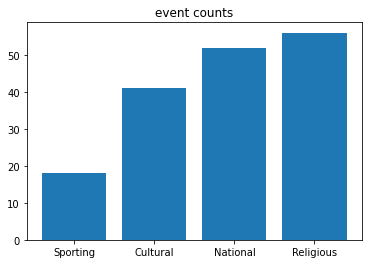

In [29]:
plt.bar(event_dic.keys(),event_dic.values())
plt.title('event counts')
plt.show()

Most of the events are Religious and National.

# Summary from calendar dataset
* From 1969 days there are 162 events (8.2% from total)
* Event are mostly Religious, National, Cultural while Sporting events are the least
* SNAP day in each State are distubuted equally at 650 days. However, it doesn't need to occur in the same day between different States. 

# Explore sales_train_evaluation DF

In [30]:
sales_train_evaluation.head(2)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0


In [31]:
print(len(sales_train_evaluation['store_id'].unique())) #there are 10 store 
print(sales_train_evaluation['store_id'].unique()) #4 in CA | 2 in TX | 3 in WI

10
['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']


In [32]:
sales_train_evaluation['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [33]:
len(sales_train_evaluation['item_id'].unique()) #there are 3049 SKU 

3049

### First, let's fix the date format of d_n to something conventional.

In [34]:
temp = pd.DataFrame(columns=['d_n'],data=sales_train_evaluation.columns[6:])
temp = temp.merge(calendar,how='left',left_on='d_n',right_on='d')
#sales_train_evaluation.columns[6:]

temp = temp[['d_n','date']]
temp.head(3)

,d_n,date
0,d_1,2011-01-29
1,d_2,2011-01-30
2,d_3,2011-01-31


In [35]:
temp_dict = { k:v for (k,v) in zip(temp['d_n'], temp['date'])} 

In [36]:
sales_edit = sales_train_evaluation.rename(columns=temp_dict)
sales_edit.head(2)

,id,item_id,dept_id,cat_id,store_id,state_id,2011-01-29 00:00:00,2011-01-30 00:00:00,2011-01-31 00:00:00,2011-02-01 00:00:00,...,2016-05-13 00:00:00,2016-05-14 00:00:00,2016-05-15 00:00:00,2016-05-16 00:00:00,2016-05-17 00:00:00,2016-05-18 00:00:00,2016-05-19 00:00:00,2016-05-20 00:00:00,2016-05-21 00:00:00,2016-05-22 00:00:00
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0


In [37]:
del temp
del temp_dict
del sales_train_evaluation

### Let's focus in store_id and dept_id for a good granularity

In [38]:
sales_edit['store_dept'] = 0
for i in range(len(sales_edit)):
    sales_edit.loc[i, 'store_dept'] = sales_edit.loc[i, 'store_id'] + '_' + sales_edit.loc[i, 'dept_id']
    

In [39]:
df_by_store_dept = sales_edit.groupby('store_dept').sum()
df_by_store_dept

,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22
store_dept,,,,,,,,,,,,,,,,,,,,,
CA_1_FOODS_1,297,284,214,175,182,191,224,263,245,176,...,412,435,415,277,302,397,330,310,427,334
CA_1_FOODS_2,674,655,396,476,354,486,554,747,581,559,...,545,611,781,555,476,427,411,434,627,719
CA_1_FOODS_3,2268,2198,1398,1607,1496,1730,1915,2952,2592,1711,...,2408,3000,3521,2366,2016,1992,2113,2249,2729,3274
CA_1_HOBBIES_1,528,489,409,383,263,453,339,750,425,375,...,546,732,631,389,347,353,354,494,656,588
CA_1_HOBBIES_2,28,9,6,9,5,14,7,19,7,9,...,42,74,56,28,46,28,52,45,63,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WI_3_FOODS_3,2293,2383,1841,1965,1427,2760,2727,3786,3179,1924,...,2061,2815,3162,1952,1602,1594,1627,2011,2360,2632
WI_3_HOBBIES_1,256,342,228,183,70,285,357,399,216,222,...,202,345,294,187,174,287,220,242,273,305
WI_3_HOBBIES_2,22,14,20,11,4,8,3,13,4,21,...,21,37,38,11,45,45,46,27,31,37


In [40]:
def split_df(df,name_list):
    df_list = []
    for name in name_list:
        temp = df.loc[name]
        df_list.append(temp)
    return df_list


In [41]:
df_list = split_df(df_by_store_dept, df_by_store_dept.index)

In [42]:
df_list[1]

2011-01-29    674
2011-01-30    655
2011-01-31    396
2011-02-01    476
2011-02-02    354
             ... 
2016-05-18    427
2016-05-19    411
2016-05-20    434
2016-05-21    627
2016-05-22    719
Name: CA_1_FOODS_2, Length: 1941, dtype: int64

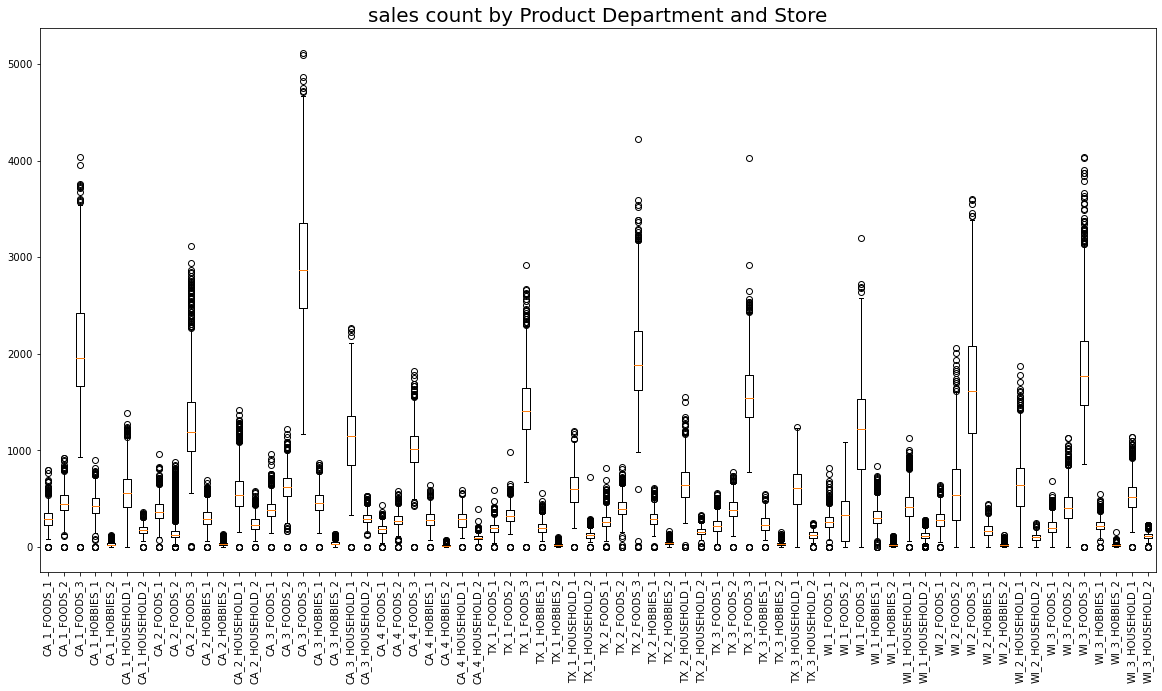

In [43]:
fig = plt.figure(figsize=(20,10))
plt.boxplot(df_list,labels=df_by_store_dept.index)
plt.title('sales count by Product Department and Store',fontsize=20)
plt.xticks(rotation = 90)
plt.show()

### Food_3 across all of the stores has the higest sales count distribution. Perhaps, This might due to the SNAP program.

Let's take a look at the total sales.

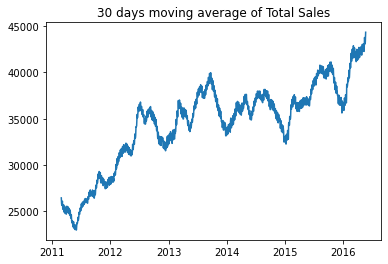

In [44]:
plt.figure()

plt.plot(df_by_store_dept.sum().index, df_by_store_dept.sum().rolling(30).mean())
plt.title('30 days moving average of Total Sales')

plt.show()

### On average sales are going in an uptrend.

In [45]:
sales_by_state = sales_edit.groupby('state_id').sum()
sales_by_state = sales_by_state.T.sum().sort_values(ascending=False)

sales_by_store = sales_edit.groupby('store_id').sum()
sales_by_store = sales_by_store.T.sum()

sales_by_category = sales_edit.groupby('cat_id').sum()
sales_by_category = sales_by_category.T.sum().sort_values(ascending=False)

sales_by_dept = sales_edit.groupby('dept_id').sum()
sales_by_dept = sales_by_dept.T.sum().sort_values(ascending=False)


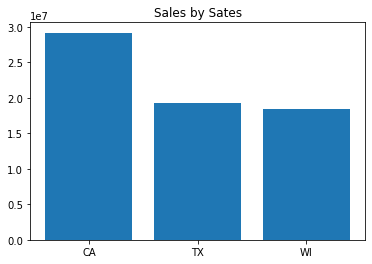

In [46]:
plt.bar(sales_by_state.index,sales_by_state.values)
plt.title('Sales by Sates')
plt.show()

### Sales in california was the biggest.

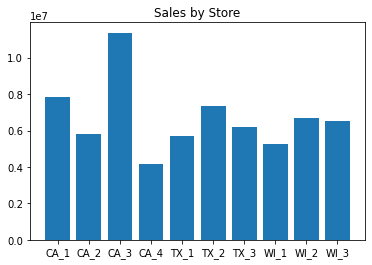

In [47]:
plt.bar(sales_by_store.index,sales_by_store.values)
plt.title('Sales by Store')
plt.show()

### Digging deeper CA_3 is the best selling store while CA_4 is the worst. Texas and Wisconsin sales are more uniformed across the State. CA_3 is the top seller for FOOD_3 as well.

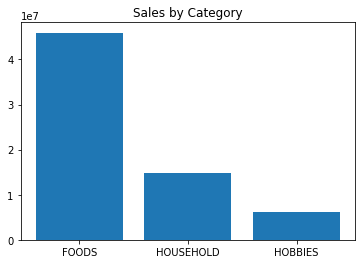

In [48]:
plt.bar(sales_by_category.index,sales_by_category.values)
plt.title('Sales by Category')
plt.show()

### Most of the sales are food ralated. This reflect the insight we have from the last boxplot.

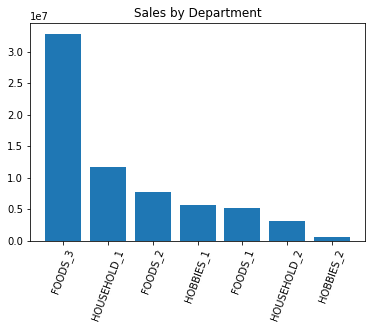

In [49]:
plt.bar(sales_by_dept.index,sales_by_dept.values)
plt.title('Sales by Department')
plt.xticks(rotation=70)
plt.show()

### Dive deeper FOODS_3 is the best selling product followed by HOUSEHOLD_1. This insight coinscide with the boxplot.

# Summary from the sales_train_evaluation DF

* Total Sales Count has been increasing every year
* There are a total of 10 Store. (4 in CA 3 in TX and 3 in WI)
* CA is the best selling State while TX and WI aren't that different in sales
* CA_3 is the best selling store among all of the 10 stores.
* CA_4 is the worst selling store among all of the 10 stores.
* There are a total of 3049 product SKU.
* FOODS is the best selling product category
* FOODS_3 is the best performer
* HOUSEHOLD_1 is the second best performer

# Join DF for further analysis

Since the data are scattered across multiple files, let's create one df that contain the whole story.

### Here's the joining plan

Join calendar and sell_prices with 'wm_yr_wk' and then join to the date.

In [50]:
sales_count = sales_edit.groupby('id').sum().stack().to_frame()

In [51]:
del sales_edit

gc.collect()

5780

In [52]:
sales_count = sales_count.reset_index()
sales_count.columns = ['id','date','#_sold']

In [53]:
sales_count.head()

,id,date,#_sold
0,FOODS_1_001_CA_1_evaluation,2011-01-29,3
1,FOODS_1_001_CA_1_evaluation,2011-01-30,0
2,FOODS_1_001_CA_1_evaluation,2011-01-31,0
3,FOODS_1_001_CA_1_evaluation,2011-02-01,1
4,FOODS_1_001_CA_1_evaluation,2011-02-02,4


In [54]:
temp = sales_count['id']
temp = [i[:-11] for i in temp]

temp1 = [i[:-5] for i in temp]
temp2 = [i[-4:] for i in temp]

In [55]:
sales_count['item_id'] = temp1
sales_count['store_id'] = temp2


del temp
del temp1
del temp2

gc.collect()

0

In [56]:
sales_count.drop('id',axis=1,inplace=True)

In [57]:
sales_count.head()

,date,#_sold,item_id,store_id
0,2011-01-29,3,FOODS_1_001,CA_1
1,2011-01-30,0,FOODS_1_001,CA_1
2,2011-01-31,0,FOODS_1_001,CA_1
3,2011-02-01,1,FOODS_1_001,CA_1
4,2011-02-02,4,FOODS_1_001,CA_1


In [58]:
sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [59]:
calendar.head()

,date,wm_yr_wk,wknd,d,event_type_1,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,1,d_1,NaN,NaN,0,0,0
1,2011-01-30,11101,1,d_2,NaN,NaN,0,0,0
2,2011-01-31,11101,0,d_3,NaN,NaN,0,0,0
3,2011-02-01,11101,0,d_4,NaN,NaN,1,1,0
4,2011-02-02,11101,0,d_5,NaN,NaN,1,0,1


In [60]:
temp = calendar.merge(sell_prices,how='left',on='wm_yr_wk')
temp.head()

,date,wm_yr_wk,wknd,d,event_type_1,event_type_2,snap_CA,snap_TX,snap_WI,store_id,item_id,sell_price
0,2011-01-29,11101,1,d_1,NaN,NaN,0,0,0,CA_1,HOBBIES_1_008,0.46
1,2011-01-29,11101,1,d_1,NaN,NaN,0,0,0,CA_1,HOBBIES_1_009,1.56
2,2011-01-29,11101,1,d_1,NaN,NaN,0,0,0,CA_1,HOBBIES_1_010,3.17
3,2011-01-29,11101,1,d_1,NaN,NaN,0,0,0,CA_1,HOBBIES_1_012,5.98
4,2011-01-29,11101,1,d_1,NaN,NaN,0,0,0,CA_1,HOBBIES_1_015,0.70


In [61]:
del calendar
del sell_prices
gc.collect()

0

In [ ]:
total_df = temp.merge(sales_count,how='left',on=['date','store_id','item_id'])

del temp
gc.collect()

In [63]:
total_df['value'] = total_df['sell_price']*total_df['#_sold']

In [64]:
total_df.head()

,date,wm_yr_wk,wknd,d,event_type_1,event_type_2,snap_CA,snap_TX,snap_WI,store_id,item_id,sell_price,#_sold,value
0,2011-01-29,11101,1,d_1,NaN,NaN,0,0,0,CA_1,HOBBIES_1_008,0.46,12.0,5.52
1,2011-01-29,11101,1,d_1,NaN,NaN,0,0,0,CA_1,HOBBIES_1_009,1.56,2.0,3.12
2,2011-01-29,11101,1,d_1,NaN,NaN,0,0,0,CA_1,HOBBIES_1_010,3.17,0.0,0.00
3,2011-01-29,11101,1,d_1,NaN,NaN,0,0,0,CA_1,HOBBIES_1_012,5.98,0.0,0.00
4,2011-01-29,11101,1,d_1,NaN,NaN,0,0,0,CA_1,HOBBIES_1_015,0.70,4.0,2.80


In [96]:
#total_df.duplicated().sum()

In [78]:
total_df.isna().sum()

date                   0
wm_yr_wk               0
wknd                   0
d                      0
event_type_1    43805087
event_type_2    47610424
snap_CA                0
snap_TX                0
snap_WI                0
store_id               0
item_id                0
sell_price             0
#_sold            853720
value             853720
dtype: int64

### Some date doesn't have the #_sold value. Let's see why?

In [79]:
temp = total_df.loc[total_df['#_sold'].isna()]

temp

,date,wm_yr_wk,wknd,d,event_type_1,event_type_2,snap_CA,snap_TX,snap_WI,store_id,item_id,sell_price,#_sold,value
46881677,2016-05-23,11617,0,d_1942,NaN,NaN,0,0,0,CA_1,HOBBIES_1_001,8.38,NaN,NaN
46881678,2016-05-23,11617,0,d_1942,NaN,NaN,0,0,0,CA_1,HOBBIES_1_002,3.97,NaN,NaN
46881679,2016-05-23,11617,0,d_1942,NaN,NaN,0,0,0,CA_1,HOBBIES_1_003,2.97,NaN,NaN
46881680,2016-05-23,11617,0,d_1942,NaN,NaN,0,0,0,CA_1,HOBBIES_1_004,4.64,NaN,NaN
46881681,2016-05-23,11617,0,d_1942,NaN,NaN,0,0,0,CA_1,HOBBIES_1_005,2.88,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47735392,2016-06-19,11621,1,d_1969,Sporting,Cultural,0,0,0,WI_3,FOODS_3_823,2.98,NaN,NaN
47735393,2016-06-19,11621,1,d_1969,Sporting,Cultural,0,0,0,WI_3,FOODS_3_824,2.48,NaN,NaN
47735394,2016-06-19,11621,1,d_1969,Sporting,Cultural,0,0,0,WI_3,FOODS_3_825,3.98,NaN,NaN
47735395,2016-06-19,11621,1,d_1969,Sporting,Cultural,0,0,0,WI_3,FOODS_3_826,1.28,NaN,NaN


In [84]:
df_by_store_dept.head(2)

,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,...,2016-05-13,2016-05-14,2016-05-15,2016-05-16,2016-05-17,2016-05-18,2016-05-19,2016-05-20,2016-05-21,2016-05-22
store_dept,,,,,,,,,,,,,,,,,,,,,
CA_1_FOODS_1,297,284,214,175,182,191,224,263,245,176,...,412,435,415,277,302,397,330,310,427,334
CA_1_FOODS_2,674,655,396,476,354,486,554,747,581,559,...,545,611,781,555,476,427,411,434,627,719


### It's because the date exceed the sales dataset. let's drop them.

In [97]:
total_df = total_df[:46881677]
total_df

gc.collect()

0

### Now the merged DF is done. Let's do the analysis.

In [98]:
#total_df.to_csv('total_df.csv',index=False)

### First, let's see the sales amount by item_id. Perhaps we could find some product champion.

In [99]:
total_amount = total_df['value'].sum()
total_amount

191577546.03999978

In [100]:
amount_by_product = total_df[['item_id','value']].groupby('item_id').sum()

In [101]:
amount_by_product['%_of_total'] = (amount_by_product['value']*100)/total_amount
amount_by_product.sort_values(by='%_of_total',ascending=False).head(10)

,value,%_of_total
item_id,,
FOODS_3_586,1482295.48,0.773731
FOODS_3_120,1444850.10,0.754186
FOODS_3_090,1377664.04,0.719116
FOODS_3_202,1272487.14,0.664215
FOODS_3_587,991308.02,0.517445
FOODS_3_252,871806.24,0.455067
FOODS_3_555,789009.48,0.411849
FOODS_3_444,719129.24,0.375372
HOBBIES_1_354,711937.14,0.371618


### The top 10 product seems to not having a very big share. I was expecting to see someting above 1.5%

### Noted that 8 out of 10 are FOOD_3

### Let's see the effect of Weekends and Holidays

In [124]:
temp = total_df.loc[total_df['wknd']==1]
temp2 = total_df.loc[total_df['wknd']==0]

mean_wknd_sales_amt = temp[['date','value']].groupby('date').sum().mean()
mean_weekday_sales_amt = temp2[['date','value']].groupby('date').sum().mean()

In [125]:
print('mean_wknd_sales_amt = {}'.format(mean_wknd_sales_amt))
print('mean_weekday_sales_amt = {}'.format(mean_weekday_sales_amt))

print('\n')

print('on average, weekend sales exceed one of the week day by {} percent'.format((mean_wknd_sales_amt-mean_weekday_sales_amt)*100/mean_weekday_sales_amt))

mean_wknd_sales_amt = value    119506.37723
dtype: float64
mean_weekday_sales_amt = value    90348.014657
dtype: float64


on average, weekend sales exceed one of the week day by value    32.273385
dtype: float64 percent


### I didn't expect the weekend sales to exceed the weekday by this much though.

### What about the Holiday?

In [126]:
temp = total_df.loc[total_df['event_type_1'].isna()]
temp2 = total_df.loc[~total_df['event_type_1'].isna()]

mean_holiday_sales_amt = temp[['date','value']].groupby('date').sum().mean()
mean_non_holiday_sales_amt = temp2[['date','value']].groupby('date').sum().mean()

In [128]:
print('mean_holiday_sales_amt = {}'.format(mean_holiday_sales_amt))
print('mean_non-holiday_sales_amt = {}'.format(mean_non_holiday_sales_amt))

print('\n')

print('on average, holiday sales exceed one of the non-holiday by {} percent'.format((mean_holiday_sales_amt-mean_non_holiday_sales_amt)*100/mean_non_holiday_sales_amt))

mean_holiday_sales_amt = value    99041.426315
dtype: float64
mean_non-holiday_sales_amt = value    94852.423544
dtype: float64


on average, holiday sales exceed one of the non-holiday by value    4.416337
dtype: float64 percent


### I neither expect the difference to be this small either.

### My assumption is that whenever it is holiday, most people want to go relax or travel instead of going to grocery store.